# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 07**: Structured Streaming with Files

**Date**: October 7th 2025

**Student Name**: Rodrigo Martín del Campo

**Professor**: Pablo Camarillo Ramirez

## Create Spark Session

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("lab07_martindelcampo") \
    .master("spark://7239a1f7373c:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

spark.conf.set("spark.sql.shuffle.partitions", "5")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/10 01:52:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
!ls ../../data/logs/
!pwd

log0.log
/opt/spark/work-dir/labs/lab07


/opt/spark/work-dir


In [ ]:
from martindelcampo.spark_utils import SparkUtils
from pyspark.sql.functions import split, col

logs_schema = SparkUtils.generate_schema([("date", "timestamp"), ("lvl", "string"), ("msg","string"), ("node","string")])

logs = spark.readStream \
    .format("text") \
    .load("/opt/spark/work-dir/data/logs/")

logs_df = logs.select(
    split(col("value"), " \\| ").alias("parts")
).select(
    col("parts").getItem(0).alias("date").cast("timestamp"),
    col("parts").getItem(1).alias("lvl"),
    col("parts").getItem(2).alias("msg"),
    col("parts").getItem(3).alias("node")
).filter(col("lvl") == "ERROR")

query = logs_df.writeStream \
            .outputMode("append") \
            .format("console") \
            .start()

query.awaitTermination()

-------------------------------------------
Batch: 0
-------------------------------------------
+-------------------+-----+--------------------+------+
|               date|  lvl|                 msg|  node|
+-------------------+-----+--------------------+------+
|2025-10-10 01:52:35|ERROR|Unauthorized acce...|node-4|
+-------------------+-----+--------------------+------+

-------------------------------------------
Batch: 1
-------------------------------------------
+----+---+---+----+
|date|lvl|msg|node|
+----+---+---+----+
+----+---+---+----+

-------------------------------------------
Batch: 2
-------------------------------------------
+----+---+---+----+
|date|lvl|msg|node|
+----+---+---+----+
+----+---+---+----+

-------------------------------------------
Batch: 3
-------------------------------------------
+----+---+---+----+
|date|lvl|msg|node|
+----+---+---+----+
+----+---+---+----+

-------------------------------------------
Batch: 4
-----------------------------------

![Screenshot 2025-10-09 195546.png](<attachment:Screenshot 2025-10-09 195546.png>)
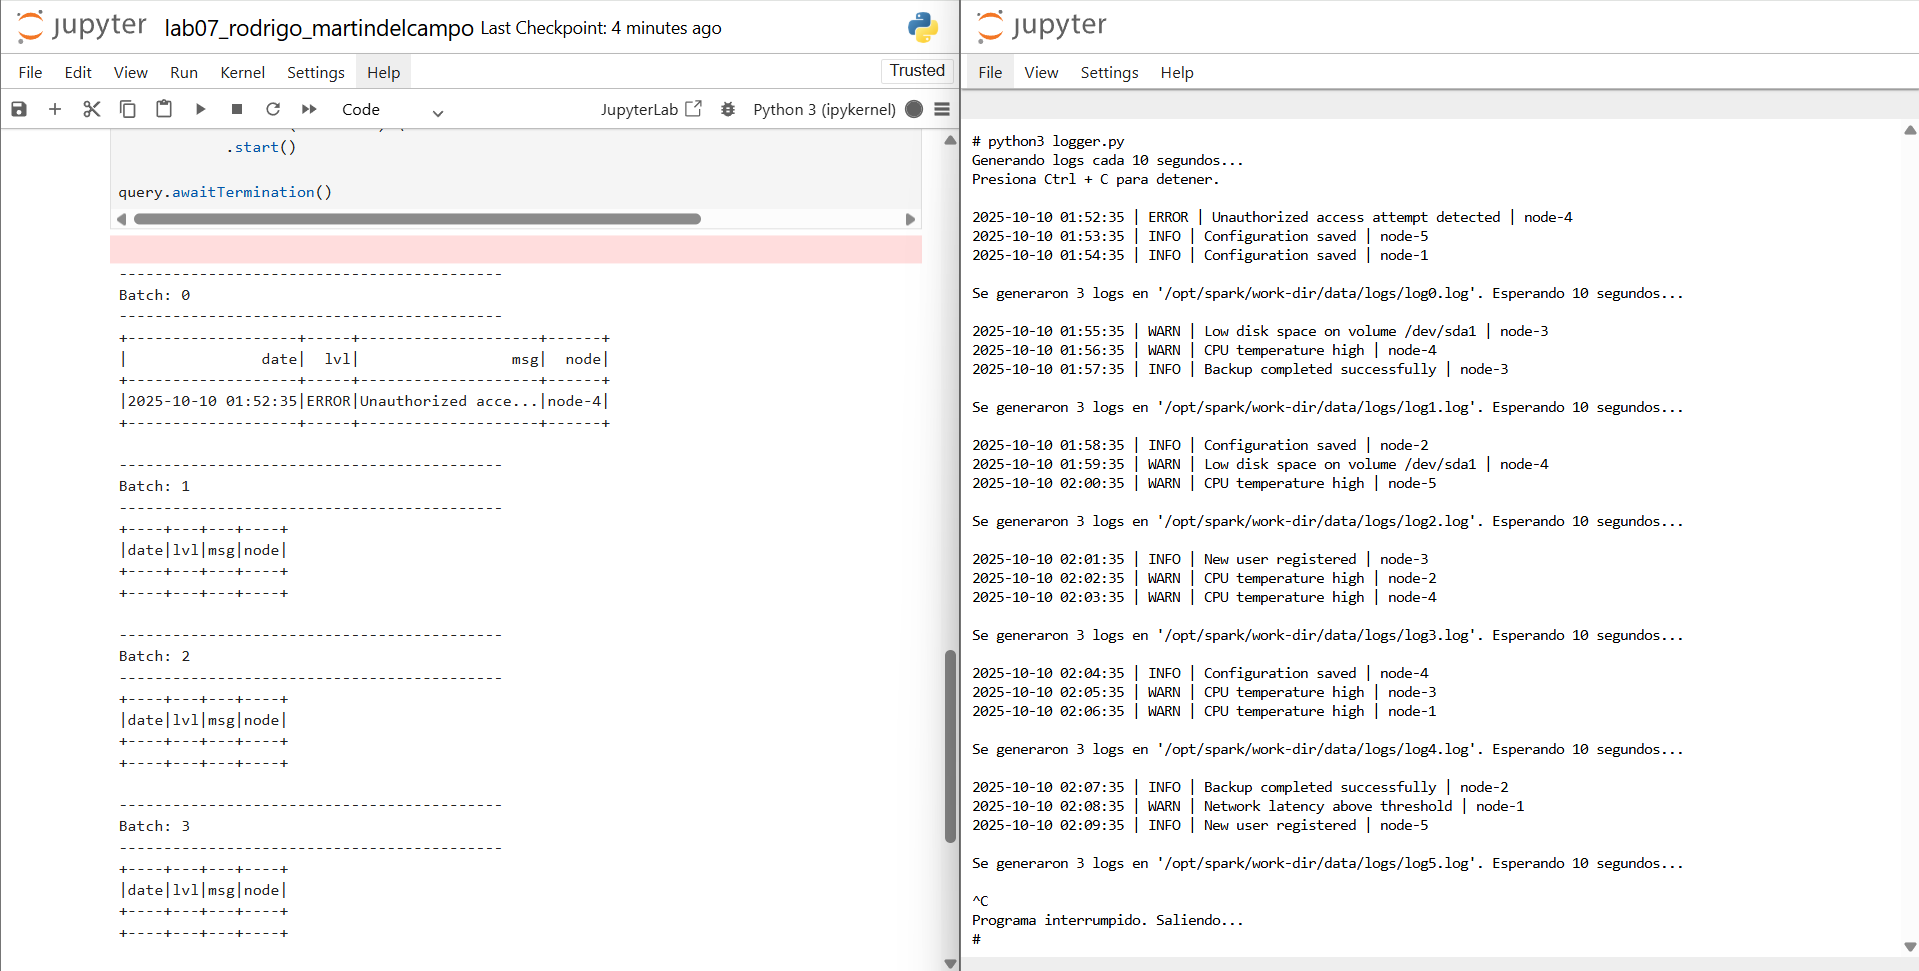

In [ ]:
query.stop()
sc.stop()